#Assignment: Exploratory Data Analysis with the Titanic Dataset


Finish the following tasks in the class using the dataset:
https://github.com/sumonacalpoly/Datasets/blob/main/Titanic_train.csv

The dataset contains information about 2206 passengers and crew members aboard the RMS Titanic when it sank on April 15, 1912. The Titanic dataset is typically used as a classification dataset. The key target variable is usually "survived," which is a binary outcome indicating whether a passenger survived (1) or did not survive (0) the disaster. Consequently, many analyses and predictive models built on this dataset focus on classifying passengers into these two groups based on various features like age, gender, ticket class, and more.

In this assignment, you will explore the distributions of key variables, compute medians, and create visualizations to better understand the data.

**Learning Outcomes & Objectives:**

- **Outcomes:**  
  - Gain proficiency in exploratory data analysis (EDA) techniques using Python.
  - Learn how to compute and interpret descriptive statistics (e.g., median) and visualize data distributions (histograms, KDE, box plots).
  - Understand how to analyze relationships between variables—especially using appropriate correlation measures for classification (like point biserial correlation).
  - Develop insights into socio-economic differences and survival patterns within the Titanic dataset.

- **Objectives:**  
  - Explore the Titanic dataset to uncover meaningful patterns in survival outcomes.
  - Apply visualization techniques to compare distributions (e.g., fare differences across classes) and analyze categorical vs. continuous relationships.
  - Use EDA as a foundation to inform feature engineering and subsequent predictive modeling.

This assignment will provide a clear roadmap for understanding the data and the analytical techniques essential for effective EDA.

**Answer the questions that follow and completet the code**

**1 Read in the Titanic data set**

In [149]:
import numpy as np
import pandas as pd

In [150]:
df = pd.read_csv("https://raw.githubusercontent.com/sumonacalpoly/Datasets/refs/heads/main/Titanic_train.csv", encoding='latin-1')
print("Number of rows, columns:", df.shape)
df.head(5)


Number of rows, columns: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2 What is the observational unit?**
Passengers



**3. What column seems to be an appropriate index for this data set? Do you see any problems with using this column as the index?**
(Hint: Try looking up "Kelly, Mr. James" or "Green, Mr. George" in this DataFrame.)



In [151]:
# [ ] # YOUR CODE HERE (if you want to further investigate the uniqueness of the 'name' column)
# For instance, you might try:
# df = df.set_index("PassengerId")
# df.head(5)

let’s set "name" as the index and then extract a DataFrame with information about the three members of the Widener family:

Widener, Mr. George Dunton
Widener, Mr. Harry Elkins
Widener, Mrs. Eleanor
Use the following code to Set 'name' as the index of the DataFrame
`titanic_df.set_index("name", inplace=True)`

In [152]:
df.set_index("Name", inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


**4. Extract rows corresponding to the Widener family**

In [153]:
widener_family = df[df.index.str.contains("Widener", case=False)]
print(widener_family)

                           PassengerId  Survived  Pclass   Sex   Age  SibSp  \
Name                                                                          
Widener, Mr. Harry Elkins          378         0       1  male  27.0      0   

                           Parch  Ticket   Fare Cabin Embarked  
Name                                                            
Widener, Mr. Harry Elkins      2  113503  211.5   C82        C  


**5. Compute the Median Age of passengers.**

Hint: Use the .median() method in pandas.

In [154]:
medianage = df["Age"].median()
print(medianage)

28.0


**6. Visualize the Age Distribution**:
Create a histogram of the age variable to visualize its distribution.

<Axes: ylabel='Frequency'>

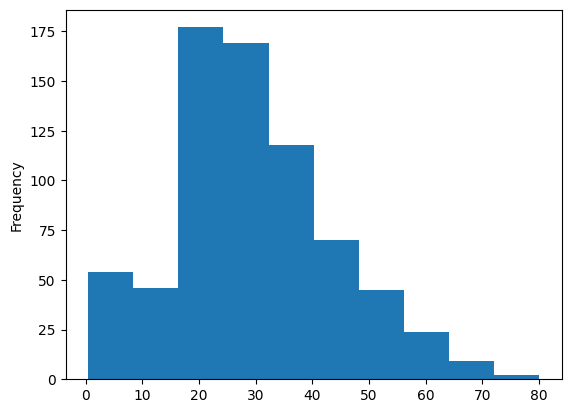

In [155]:
df['Age'].plot.hist()



**7. Calculate both the mean and the median of the fare column.**



In [156]:
# YOUR CODE HERE: Calculate and print mean and median fare
meanfare = df["Fare"].mean()
medianfare = df["Fare"].median()

print("meanfare", meanfare)
print("medianfare", medianfare)


meanfare 32.204207968574636
medianfare 14.4542


**8. What does the difference between the mean and the median suggest about the fare distribution?**

The difference represents there may be outliers that heavily influence the mean to be much greater than the median. It would look like a right-skewed graph because mean > median.

**9. Create a box plot to visualize the distribution of fares across different passenger classes (pclass).**

**10. What differences do you notice in the fare distributions among the classes?**

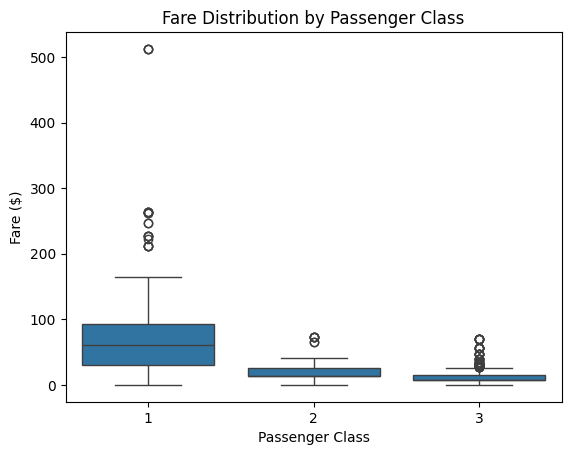

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Pclass", y="Fare", data=df)

plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare ($)")
plt.show()

# The fare distribution is much higher the lower the passenger class.


**11. Consider how the median fare and the spread of fares differ between classes. What might this indicate about the socio-economic differences among passengers?**


The median fare and the spread of fares may describe the larger fare influence from lower passenger class.


**12. Survival Rate Analysis by Passenger Class:**
Create a bar plot that shows the survival rate (i.e., proportion of survivors) for each passenger class. Use the `pclass` and `survived` columns to calculate the survival rate.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


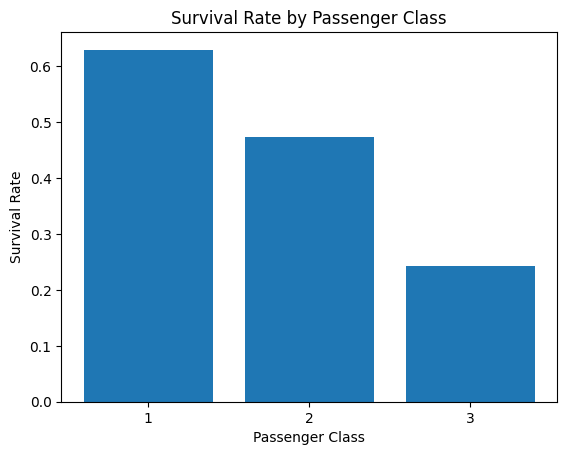

In [158]:
import matplotlib.pyplot as plt

# Calculate survival rate per class
survival_rate = df.groupby("Pclass")["Survived"].mean()
print(survival_rate)

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(survival_rate.index.astype(str), survival_rate.values)

# Set titles and labels
ax.set_title("Survival Rate by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Survival Rate")

plt.show()



**13. What insights can you derive regarding the relationship between passenger class and survival rate?**

There is a negative relationship such that the higher tha passenger class, the lower the survival rate. 

**14. Correlation Analysis Using Point Biserial Correlation**:
For a continuous variable like fare or age and the binary target survived, compute the point biserial correlation. Use `scipy.stats.pointbiserialr` for this task.

In [161]:
from scipy.stats import pointbiserialr

df = df.dropna(subset=['Fare', 'Age', 'Survived'])

# YOUR CODE HERE: Compute point biserial correlation between age and survived
corr_age, pval_age = pointbiserialr(df["Survived"], df["Age"])
print(f"Point Biserial Correlation between Survived and Age: {corr_age} (p-value = {pval_age})")


# YOUR CODE HERE: Compute point biserial correlation between fare and survived
corr_fare, pval_fare = pointbiserialr(df["Survived"], df["Fare"])
print(f"Point Biserial Correlation between Survived and Fare: {corr_fare} (p-value = {pval_fare})")



Point Biserial Correlation between Survived and Age: -0.07722109457217767 (p-value = 0.039124654013482446)
Point Biserial Correlation between Survived and Fare: 0.26818861687447876 (p-value = 3.1559945704844404e-13)


**15. How strong are the associations between age/fare and survival? What might these correlations indicate about survival likelihood?**

The association between survival and age seems low with around a negative 7% correlation. 
The association between survivla and fare is also low with around a postive 27% correlation.

This may suggest that fares have a larger influence on surival than age.